In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("vacancies.csv")

C:\Users\ostan\AppData\Local\Temp\ipykernel_24376\1145290737.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("vacancies.csv")


In [3]:
df_vac = df[df["name"].str.contains("python|питон|пайтон")]

In [7]:
df_vac.dropna(subset=['key_skills'],inplace=True)

C:\Users\ostan\AppData\Local\Temp\ipykernel_24376\999710508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac.dropna(subset=['key_skills'],inplace=True)


In [8]:
df_vac.insert(6, "year", df_vac.apply(lambda row: row.published_at.split('-')[0], axis=1), True)

In [10]:
years = df_vac['year'].unique()

In [12]:
df_group_year = df_vac.groupby(by="year")

In [11]:
from collections import Counter


In [13]:
vac_years_dict = {}

for year in years:
    key_skills = df_group_year.get_group(year)['key_skills'].to_list()
    skills = '\n'.join(key_skills).replace('\r','').split('\n')
    count_skills = Counter(skills).most_common()[:20]
    dict_skills = {k: v for k,v in count_skills}
    vac_years_dict[year] = dict_skills


In [14]:
vac_years_dict

{'2015': {'Python': 14,
  'Django Framework': 12,
  'Linux': 7,
  'PostgreSQL': 5,
  'Git': 4,
  'CSS': 4,
  'SQL': 3,
  'JavaScript': 3,
  'Java': 2,
  'HTML': 2,
  'MySQL': 2,
  'jQuery': 2,
  'HTML5': 2,
  'Администрирование серверов Linux': 2,
  'Ajax': 2,
  'Teamplayer': 2,
  'Работа в команде': 2,
  'TDD': 2,
  'Web Application Development': 2,
  'Nginx': 1},
 '2016': {'Python': 42,
  'Linux': 24,
  'PostgreSQL': 15,
  'Git': 13,
  'PHP': 12,
  'jQuery': 10,
  'CSS': 10,
  'SQL': 9,
  'Ajax': 8,
  'Django Framework': 7,
  'JavaScript': 7,
  'MongoDB': 7,
  'Java': 7,
  'HTML5': 7,
  'TDD': 6,
  'Flask': 6,
  'Teamplayer': 5,
  'Работа в команде': 5,
  'Web Application Development': 5,
  'owasp': 5},
 '2017': {'Python': 51,
  'Django Framework': 32,
  'Git': 25,
  'PostgreSQL': 19,
  'JavaScript': 19,
  'Linux': 14,
  'CSS': 11,
  'HTML': 9,
  'SQL': 8,
  'jQuery': 8,
  'MySQL': 7,
  'MongoDB': 6,
  'Node.js': 4,
  'HTML5': 4,
  'ООП': 4,
  'PHP': 4,
  'Docker': 4,
  'AngularJS': 

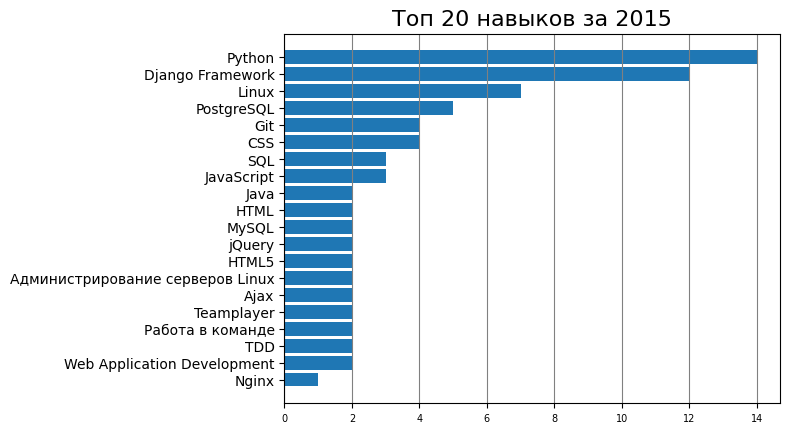

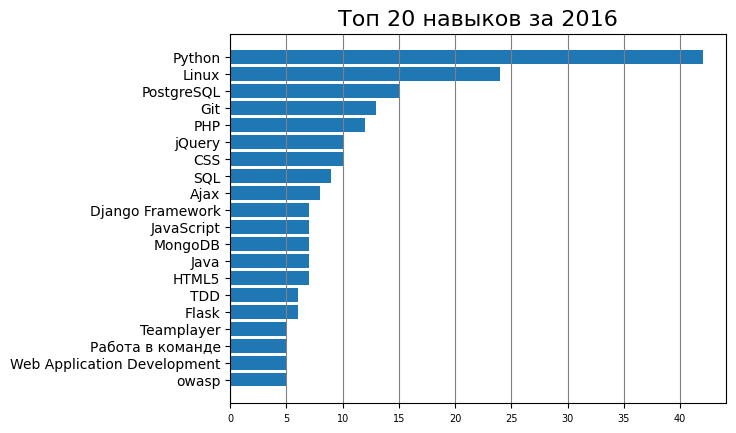

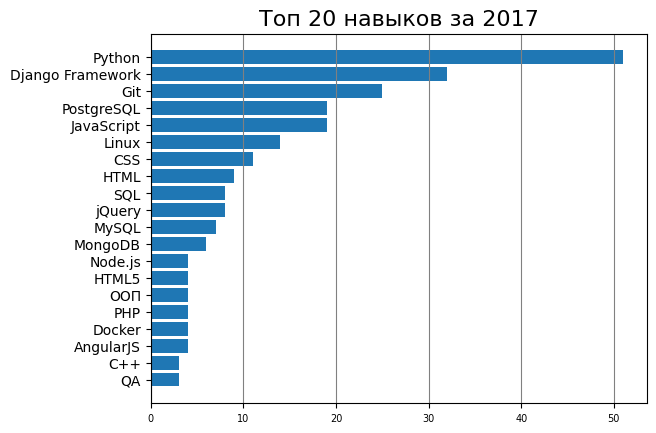

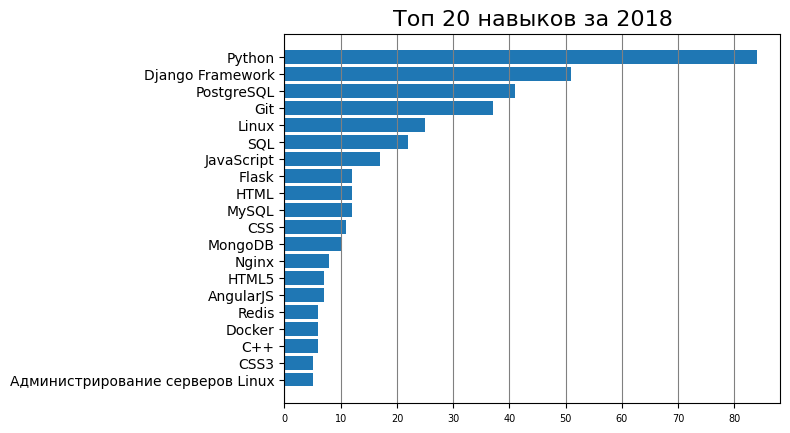

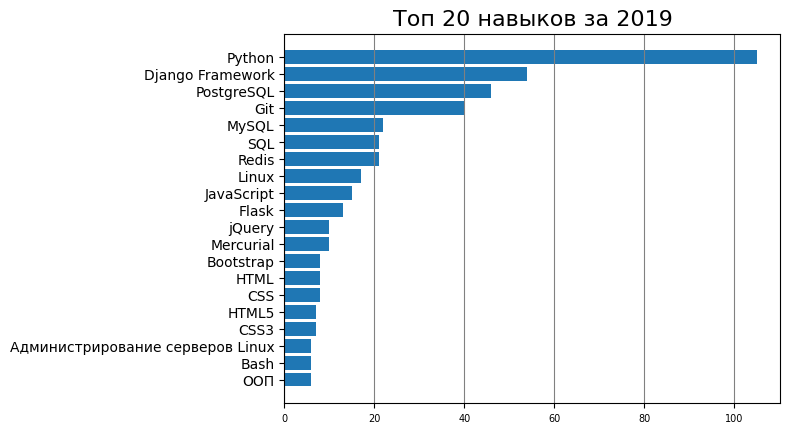

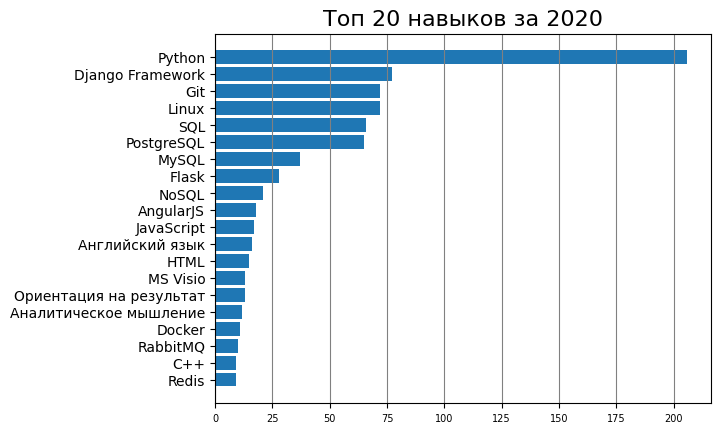

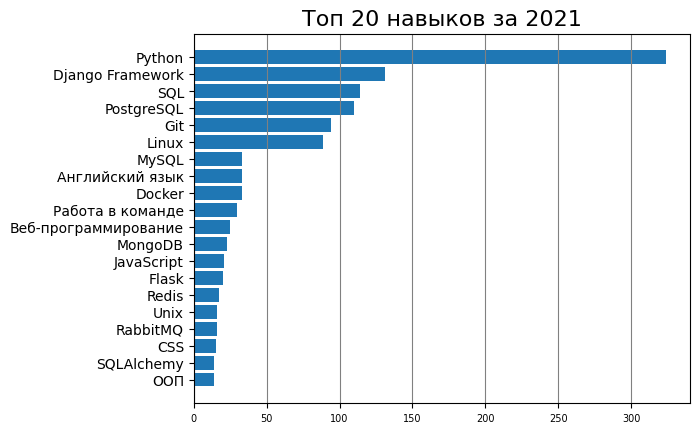

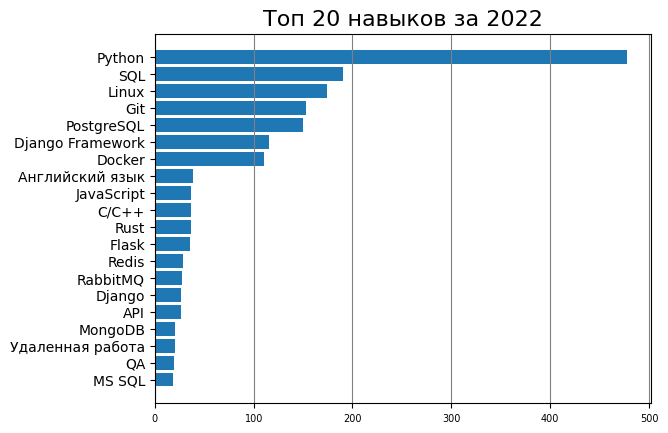

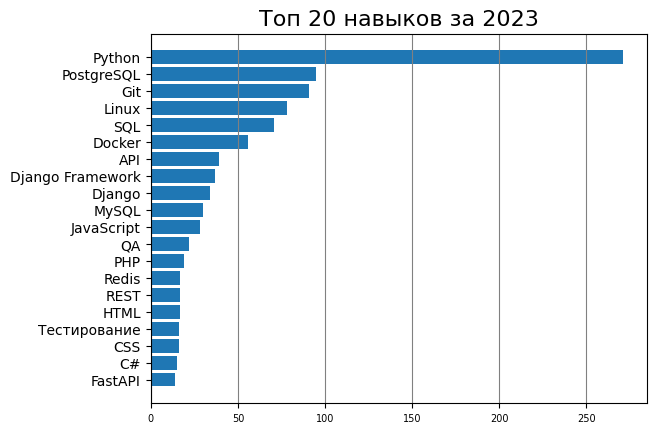

In [15]:
for year in years:
    plt.barh(list(vac_years_dict[year].keys()),list(vac_years_dict[year].values()))
    plt.xticks(rotation=0, size=7)
    plt.title(f'Топ 20 навыков за {int(year)}',size=16)
    plt.gca().invert_yaxis()
    plt.gca().xaxis.grid(color='gray')
    plt.show()  

In [16]:
for year in years:
    dict_skills = {k: v for k, v in sorted(vac_years_dict[year].items(), key=lambda kv: (-kv[1], kv[0]))}
    pd.DataFrame(list(dict_skills.items ()), columns = [f'Топ навыков за {int(year)} для Python-разработчика', 'Количество']).to_html(f'skills_vac_{int(year)}.html')